In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [32]:
# path = "results/linear_multi"
# path = "results/linear_multi/N500"
path = "results/nonlinear_multi"
# path = "results/nonlinear_multi/trunc_parab"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/nonlinear_multi\\nonlinear_dgp_1.csv', 'results/nonlinear_multi\\nonlinear_dgp_10.csv', 'results/nonlinear_multi\\nonlinear_dgp_11.csv', 'results/nonlinear_multi\\nonlinear_dgp_12.csv', 'results/nonlinear_multi\\nonlinear_dgp_13.csv', 'results/nonlinear_multi\\nonlinear_dgp_14.csv', 'results/nonlinear_multi\\nonlinear_dgp_15.csv', 'results/nonlinear_multi\\nonlinear_dgp_2.csv', 'results/nonlinear_multi\\nonlinear_dgp_3.csv', 'results/nonlinear_multi\\nonlinear_dgp_4.csv', 'results/nonlinear_multi\\nonlinear_dgp_5.csv', 'results/nonlinear_multi\\nonlinear_dgp_6.csv', 'results/nonlinear_multi\\nonlinear_dgp_7.csv', 'results/nonlinear_multi\\nonlinear_dgp_8.csv', 'results/nonlinear_multi\\nonlinear_dgp_9.csv']


In [33]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [36]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

     idx      mean  median      TRUE   bias    std   RMSE    MAE   MAPE  \
0      1  6.030000   6.030  7.818000 -1.788  0.127  3.058  2.192  0.411   
1      1  7.377000   7.379  7.818000 -0.441  0.105  1.236  0.831  0.258   
2      1  8.139000   8.140  9.318001 -1.179  0.170  2.289  1.672  0.171   
3      1  9.003000   9.003  9.318001 -0.315  0.152  1.169  0.739  0.073   
4      1  4.596000   4.597  7.818000 -3.222  0.149  4.427  3.518  0.681   
..   ...       ...     ...       ...    ...    ...    ...    ...    ...   
155  504  7.646000   7.652  9.191000 -1.545  0.237  2.477  1.698  0.172   
156  504  6.735000   6.734  7.816001 -1.081  0.131  3.052  2.278  0.522   
157  504  7.178000   7.179  7.816001 -0.638  0.160  2.332  1.646  0.438   
158  504  8.553000   8.552  9.191000 -0.638  0.184  2.257  1.588  0.162   
159  504  8.712001   8.710  9.191000 -0.479  0.236  2.699  1.442  0.148   

         q025      q975  covering  mean_ind_cover           method estimand  \
0    5.777000  6.279

In [35]:
# combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

KeyError: "['true'] not in index"

In [38]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['TRUE'])/combined_df['TRUE'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [39]:
combined_df[combined_df["estimand"]=="dynamic"]

,idx,mean,median,TRUE,bias,std,RMSE,MAE,MAPE,q025,q975,covering,mean_ind_cover,method,estimand,model,type,abs_bias,ci_length,MAPE_manual
0,1,6.030,6.030,7.818000,-1.788,0.127,3.058,2.192,0.411,5.777,6.279000,0,0.090,Linear_oracle,dynamic,Linear,Oracle,1.788,0.502,0.228703
1,1,7.377,7.379,7.818000,-0.441,0.105,1.236,0.831,0.258,7.169,7.580000,0,0.386,GP_oracle,dynamic,GP,Oracle,0.441,0.411,0.056408
4,1,4.596,4.597,7.818000,-3.222,0.149,4.427,3.518,0.681,4.301,4.889000,0,0.058,Linear_observed,dynamic,Linear,Obs.,3.222,0.588,0.412126
5,1,4.541,4.541,7.818000,-3.277,0.193,4.134,3.550,1.651,4.158,4.921000,0,0.066,GP_observed,dynamic,GP,Obs.,3.277,0.763,0.419161
8,1,5.821,5.819,7.818000,-1.997,0.167,3.311,2.496,0.588,5.496,6.156000,0,0.280,Linear_3S,dynamic,Linear,3S,1.997,0.660,0.255436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,504,6.143,6.143,7.816001,-1.673,0.189,3.093,2.592,0.875,5.771,6.506000,0,0.162,GP_observed,dynamic,GP,Obs.,1.673,0.735,0.214048
152,504,6.549,6.546,7.816001,-1.267,0.150,3.034,2.298,0.516,6.261,6.851000,0,0.330,Linear_3S,dynamic,Linear,3S,1.267,0.590,0.162103
153,504,6.648,6.648,7.816001,-1.168,0.176,2.352,1.942,0.453,6.305,6.991000,0,0.442,GP_3S,dynamic,GP,3S,1.168,0.686,0.149437
156,504,6.735,6.734,7.816001,-1.081,0.131,3.052,2.278,0.522,6.477,6.996000,0,0.090,Linear_1S,dynamic,Linear,1S,1.081,0.519,0.138306


In [41]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'TRUE' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'MAE' : ['mean'],
                                         'MAPE' : ['mean'],
                                         # 'MAPE_manual' : ['mean'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean']}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,TRUE,RMSE,MAE,MAPE,q025,q975,ci_length,covering,mean_ind_cover
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,coverage_perc,mean
0,dynamic,GP,1S,7.633240,7.633180,0.158973,-0.558273,8.191514,2.019847,1.466340,0.689540,7.321300,7.945227,0.623927,20.000000,0.329853
1,dynamic,GP,3S,7.061780,7.062347,0.170933,-1.129733,8.191514,2.192660,1.783487,0.622793,6.724487,7.396700,0.672213,2.000000,0.487733
2,dynamic,GP,Obs.,6.106980,6.107260,0.193647,-2.084533,8.191514,3.185633,2.671473,1.181933,5.725594,6.485314,0.759720,0.000000,0.155067
3,dynamic,GP,Oracle,7.848220,7.848354,0.105460,-0.343293,8.191514,1.330293,0.878467,0.330800,7.641007,8.054294,0.413287,25.333333,0.345507
4,dynamic,Linear,1S,6.794540,6.794660,0.150627,-1.396973,8.191514,3.257860,2.362633,0.709107,6.498267,7.089780,0.591513,0.000000,0.109920
5,dynamic,Linear,3S,6.625900,6.623307,0.168073,-1.565613,8.191514,3.303273,2.425140,0.701367,6.298407,6.963687,0.665280,0.000000,0.306173
6,dynamic,Linear,Obs.,5.692080,5.692147,0.146973,-2.499433,8.191514,4.091780,3.156353,0.756600,5.402480,5.978414,0.575933,0.000000,0.055000
7,dynamic,Linear,Oracle,6.922714,6.922727,0.134380,-1.268800,8.191514,3.083087,2.102507,0.451907,6.658640,7.185934,0.527293,0.000000,0.134347
8,stoch,GP,1S,8.585380,8.585787,0.210207,-0.706073,9.291454,2.178340,1.273820,0.133613,8.170960,8.996400,0.825440,20.666667,0.451280


Text(0, 0.5, '')

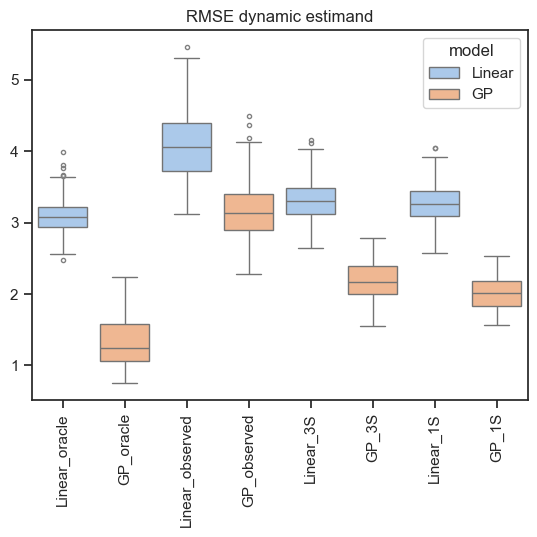

In [42]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

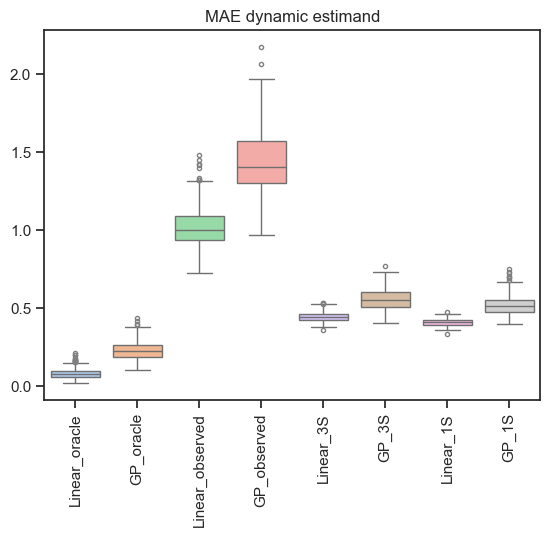

In [14]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

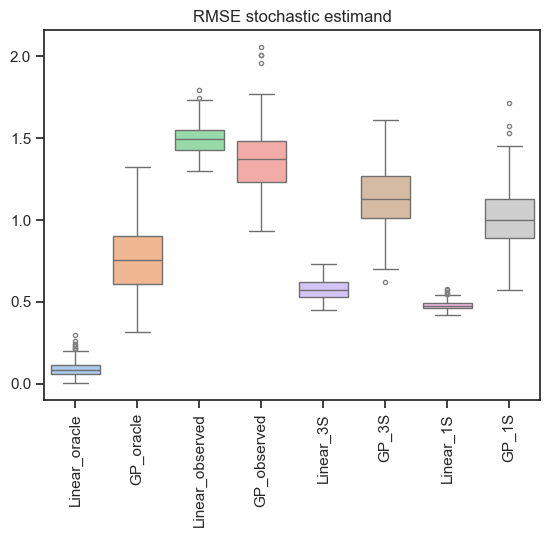

In [15]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

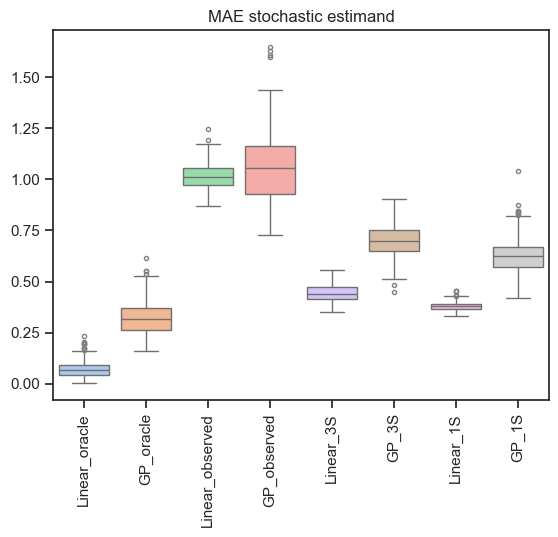

In [17]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

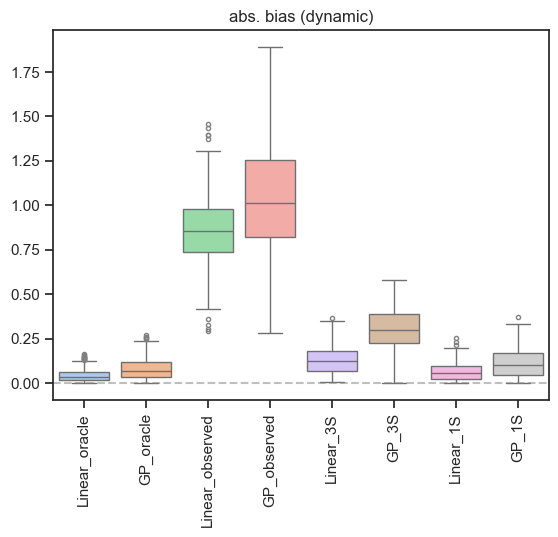

In [18]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

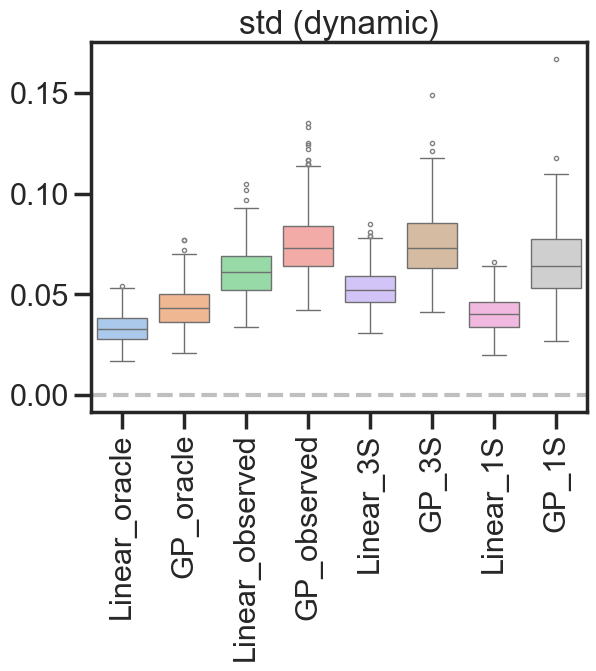

In [19]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
# plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

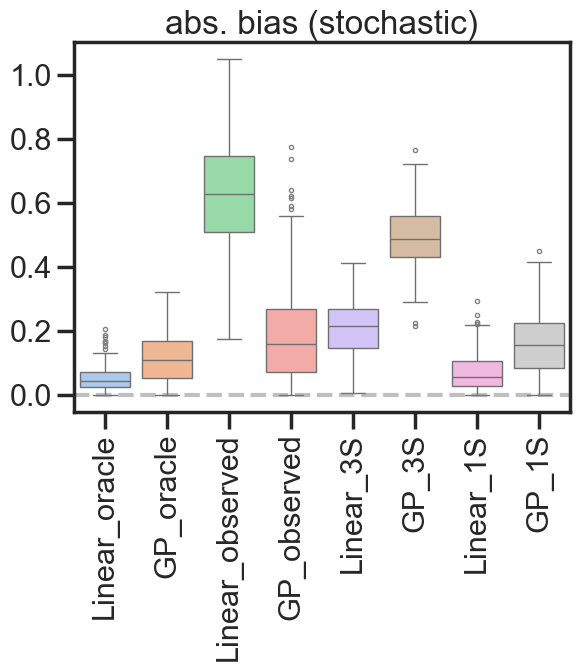

In [14]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

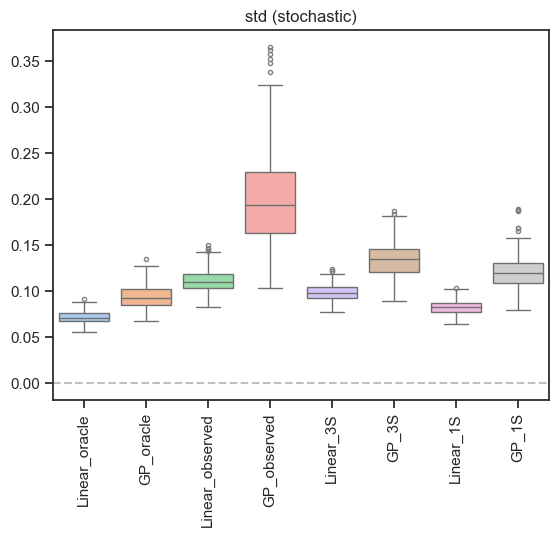

In [19]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [21]:
def format_percentage(value, x=1):
    return f"{value*x:.1f}%"

df_summary_dynamic = df_summary[df_summary["estimand"]=="dynamic"]
# df_summary_dynamic = df_summary[df_summary["estimand"]=="stoch"]
df_summary_dynamic.columns = df_summary_dynamic.columns.droplevel(1)
df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)
print(df_summary_dynamic)

combined_df_dynamic = combined_df[combined_df["estimand"]=="dynamic"]
# combined_df_dynamic = combined_df[combined_df["estimand"]=="stoch"]
# print(combined_df_dynamic)

  estimand   model    type      mean    median       std      bias      true  \
0  dynamic      GP      1S  4.881434  4.882110  0.092727 -0.093713  4.970185   
1  dynamic      GP      3S  4.672407  4.672663  0.100463 -0.302740  4.970185   
2  dynamic      GP    Obs.  3.932987  3.933017  0.116117 -1.042160  4.970185   
3  dynamic      GP  Oracle  4.906684  4.906907  0.075427 -0.068463  4.970185   
4  dynamic  Linear      1S  4.969200  4.969247  0.063533 -0.005947  4.970185   
5  dynamic  Linear      3S  4.851130  4.850007  0.080417 -0.124017  4.970185   
6  dynamic  Linear    Obs.  4.115284  4.115310  0.070003 -0.859863  4.970185   
7  dynamic  Linear  Oracle  4.973337  4.973350  0.056093 -0.001810  4.970185   

       RMSE       MAE      MAPE      q025      q975  ci_length   covering  \
0  0.734227  0.518363  0.221207  4.697367  5.061374   0.364007  77.666667   
1  0.790010  0.556997  0.218563  4.474334  4.868550   0.394217  13.000000   
2  1.842773  1.438583  0.498600  3.705400  4.160

C:\Users\bar21\AppData\Local\Temp\ipykernel_15668\2229529795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
C:\Users\bar21\AppData\Local\Temp\ipykernel_15668\2229529795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)


In [22]:
df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)

print(df_summary_dynamic)


  estimand   model    type      mean    median       std      bias      true  \
0  dynamic      GP      1S  4.881434  4.882110  0.092727 -0.093713  4.970185   
1  dynamic      GP      3S  4.672407  4.672663  0.100463 -0.302740  4.970185   
2  dynamic      GP    Obs.  3.932987  3.933017  0.116117 -1.042160  4.970185   
3  dynamic      GP  Oracle  4.906684  4.906907  0.075427 -0.068463  4.970185   
4  dynamic  Linear      1S  4.969200  4.969247  0.063533 -0.005947  4.970185   
5  dynamic  Linear      3S  4.851130  4.850007  0.080417 -0.124017  4.970185   
6  dynamic  Linear    Obs.  4.115284  4.115310  0.070003 -0.859863  4.970185   
7  dynamic  Linear  Oracle  4.973337  4.973350  0.056093 -0.001810  4.970185   

       RMSE       MAE      MAPE      q025      q975  ci_length   covering  \
0  0.734227  0.518363  0.221207  4.697367  5.061374   0.364007  77.666667   
1  0.790010  0.556997  0.218563  4.474334  4.868550   0.394217  13.000000   
2  1.842773  1.438583  0.498600  3.705400  4.160

C:\Users\bar21\AppData\Local\Temp\ipykernel_15668\2384414092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)


In [23]:
df_summary_dynamic["true"]

0    4.970185
1    4.970185
2    4.970185
3    4.970185
4    4.970185
5    4.970185
6    4.970185
7    4.970185
Name: true, dtype: float64

C:\Users\bar21\AppData\Local\Temp\ipykernel_15668\2107373927.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)


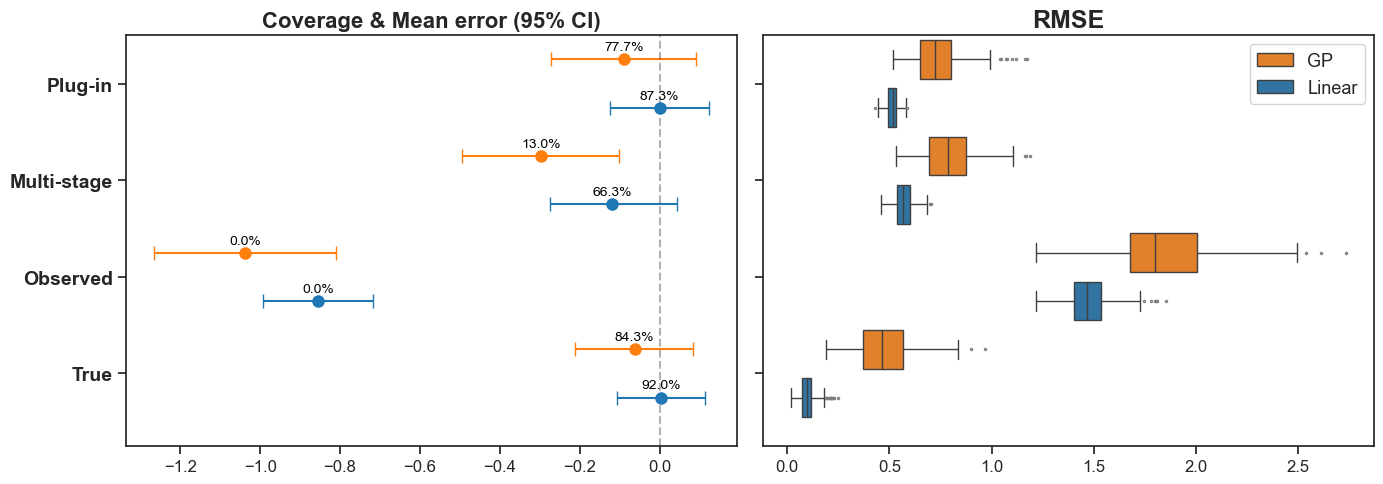

In [26]:
# Plot points with error bars
categories = np.arange(len(df_summary_dynamic['model_type']))
category_labels = df_summary_dynamic['model_type'].unique()

# Create a dictionary to map category positions

# Map categ to positions
model_names = ['True', 'Observed', 'Multi-stage', 'Plug-in']
model_order = ['Linear_Oracle', 'GP_Oracle', 'Linear_Obs.', 'GP_Obs.',
               'Linear_3S', 'GP_3S', 'Linear_1S', 'GP_1S']
categ_pos = {category: pos for pos, category in enumerate(model_order)}
df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)
# combined_df_dynamic['categ_pos'] = combined_df_dynamic['model_type'].map(categ_pos)

# Assign colors to categ2
unique_categ2 = df_summary_dynamic['model']
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_categ2)))
color_map = { "GP" : "tab:orange", "Linear" : "tab:blue"}
# color_map = dict(zip(unique_categ2, colors))

# Plotting
plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('fast')

fig, axs = plt.subplots(1, 2, figsize=(14, 5),
                        gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
# for ax in axs:
#     ax.set_facecolor('white')
# Plot points with different colors based on categ2
for categ2 in unique_categ2:
    subset = df_summary_dynamic[df_summary_dynamic['type'] == categ2]
    axs[0].scatter(subset['mean'],
                subset['categ_pos'],
                label=f'{categ2}', color=color_map[categ2], s=650)


for i, row in df_summary_dynamic.iterrows():
    axs[0].errorbar(
        row['mean'] - row['true'], 
        row['categ_pos'], 
        xerr=[[row['mean'] - row['q025']],
              [row['q975'] - row['mean']]], 
        fmt='o', 
        # color='black', 
        color = color_map[row['model']], 
        ecolor = color_map[row['model']], 
        # ecolor='black', 
        capsize=5, markersize = 8   
    )
    
    axs[0].annotate(
                    # row['mean_ind_cover'], 
                    row['coverage'], 
                    xy=(row['mean'] - row['true'], row['categ_pos']), 
                    xytext=(0, 13), 
                    textcoords='offset points', 
                    ha='center', 
                    va='top',
                    fontsize=10, 
                    color='black')    

# Customize the x-axis to show category labels
axs[0].set_yticks(np.arange(0.5,len(model_order),2))
# axs[0].set_yticklabels(model_order)
axs[0].set_yticklabels(model_names, fontsize=14, fontweight='bold')
axs[0].set_ylim(-1, len(model_order) - 0.5)
# axs[0].axvline(df_summary_dynamic["true"][0], color='grey', linestyle='--', alpha=0.5)
axs[0].axvline(0, color='black', linestyle='--', alpha=0.3)
axs[0].set_title('Coverage & Mean error (95% CI)', fontsize=16, fontweight='bold')
# axs[0].grid(True)


flierprops = dict(marker='.', markerfacecolor='None', markersize=3,  markeredgecolor='grey')
sns.boxplot(
    data=combined_df_dynamic, 
    # x='MAE', 
    x='RMSE', 
    # x='MAPE', 
    y='method', 
    hue="model", 
    palette=color_map, 
    ax=axs[1],
    flierprops=flierprops
)

axs[1].set_yticks(np.arange(0.5,len(model_order),2))
axs[1].set_ylim(-1, len(model_order) - 0.5)
# axs[1].set_yticklabels([])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('RMSE', fontsize=18, fontweight='bold')
handles, labels = axs[1].get_legend_handles_labels()
ordered_handles = [handles[1], handles[0]]  # Reorder legend
ordered_labels = [labels[1], labels[0]]  # Reorder labels
axs[1].legend(ordered_handles, ordered_labels, title='', loc='upper right', 
              fontsize=13)
# axs[1].grid(True)
plt.tight_layout()
# plt.style.use('seaborn-whitegrid')
axs[0].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)


# plt.savefig('results/figs/nonlin_truncated_parab.png', dpi = 1000)           # Save as PNG file
plt.show()
